In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.0'

In [2]:
from keras.layers import SimpleRNN

In [3]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [4]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [5]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # 맨 위 층만 마지막 출력을 반환합니다.
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [6]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # 특성으로 사용할 단어의 수
maxlen = 500  # 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용합니다)
batch_size = 32

print('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

print('시퀀스 패딩 (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

데이터 로딩...
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


In [7]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.6715 - acc: 0.5716 - val_loss: 0.5651 - val_acc: 0.7288
Epoch 2/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.4486 - acc: 0.8005 - val_loss: 0.3870 - val_acc: 0.8352
Epoch 3/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.3130 - acc: 0.8714 - val_loss: 0.3860 - val_acc: 0.8370
Epoch 4/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.2279 - acc: 0.9087 - val_loss: 0.3835 - val_acc: 0.8464
Epoch 5/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.1710 - acc: 0.9387 - val_loss: 0.3981 - val_acc: 0.8498
Epoch 6/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.0983 - acc: 0.9676 - val_loss: 0.4907 - val_acc: 0.8374
Epoch 7/10
20000/20000 [==========

In [8]:
import matplotlib.pyplot as plt

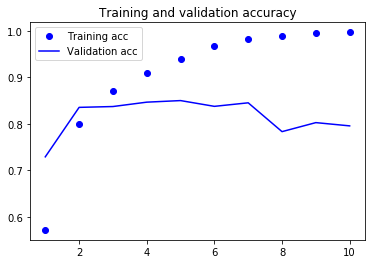

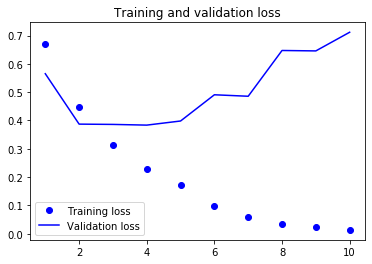

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 54s 3ms/step - loss: 0.5363 - acc: 0.7375 - val_loss: 0.4017 - val_acc: 0.8242
Epoch 2/10
20000/20000 [==============================] - 54s 3ms/step - loss: 0.3094 - acc: 0.8753 - val_loss: 0.3134 - val_acc: 0.8770
Epoch 3/10
20000/20000 [==============================] - 53s 3ms/step - loss: 0.2403 - acc: 0.9086 - val_loss: 0.3241 - val_acc: 0.8804
Epoch 4/10
20000/20000 [==============================] - 55s 3ms/step - loss: 0.2083 - acc: 0.9233 - val_loss: 0.2843 - val_acc: 0.8870
Epoch 5/10
20000/20000 [==============================] - 55s 3ms/step - loss: 0.1758 - acc: 0.9373 - val_loss: 0.2892 - val_acc: 0.8780
Epoch 6/10
20000/20000 [==============================] - 56s 3ms/step - loss: 0.1602 - acc: 0.9440 - val_loss: 0.4647 - val_acc: 0.8700
Epoch 7/10
20000/20000 [==============================] - 56s 3ms/step - loss: 0.1434 - acc: 0.9492 - val_loss: 0.3351 - val_acc:

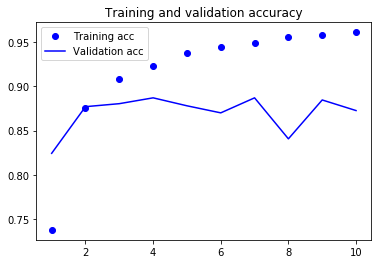

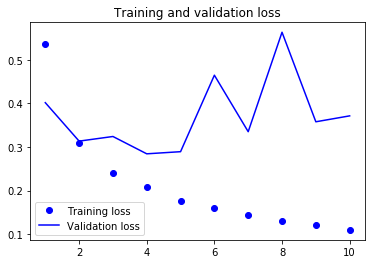

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()